<b>Basic Dense Neural NW on trimagi dataset for Kaggle competition</b>

In this code was created as a simple test on how to form a dense Neural network. The dataset used was from Kaggle competition called Teenmagi-2022. **1.3 million images and 1000 classes.** The network is not efficient but used as a means to study different techniques.

**Note**: The dataset is loaded processed in earlier codes.

[Kaggle Teenmagi-2022](https://www.kaggle.com/competitions/teenmagi-2022)

In [14]:
#### Basic Dense Neural NW on trimagi dataset for Kaggle competition

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from numpy import load
import gc

#========== Neural NW
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential


print("Libraries Loaded")

Libraries Loaded


In [15]:
# load dict of arrays
dict_Batch1_X = load('../input/processed-batches/Batch1_X.npz')
dict_Batch1_Y = load('../input/processed-batches/Batch1_Y.npz')

dict_Batch10_X = load('../input/processed-batches/Batch10_X.npz')
dict_Batch10_Y = load('../input/processed-batches/Batch10_Y.npz')

dict_Validation = load('../input/processed-total-dataset/Processed_Val.npz')

# extract the first array
X = dict_Batch1_X['arr_0']
Y = dict_Batch1_Y['arr_0']

X_TEST = dict_Batch10_X['arr_0']
Y_TEST = dict_Batch10_Y['arr_0']

Val = dict_Validation['arr_0']

#Keep single channel only
X = X[:,:,:,0]
X_TEST = X_TEST[:,:,:,0]
Val = Val[:,:,:,0]

#Scale Validation data between 0 and 1, Others were already scaled.
Val = (Val - np.min(Val)) / (np.max(Val) - np.min(Val)).astype(np.float32)

#full_X = dict_X['arr_0']
# print the array
print("Training Dataset's Dimensions:" ,X.shape,"class Dim: ", Y.shape)
print("Test Dataset's Dimensions:" ,X_TEST.shape,"class Dim: ", Y_TEST.shape)
print("Validation Dataset's Dimensions:" ,Val.shape)
print()

#print("full_X Training Dataset's Dimensions:" ,full_X.shape)

del dict_Batch1_X
del dict_Batch1_Y
del dict_Batch10_X
del dict_Batch10_Y
del dict_Validation

#Split Test images to Validation and Test
X_Tst, X_Val, Y_Tst, Y_Val = train_test_split(X_TEST, Y_TEST, test_size=0.5, random_state=0, stratify=Y_TEST)
print("Test Dataset's Dimensions:" ,X_Val.shape,"class Dim: ", Y_Val.shape)


Y_Val=tf.one_hot(Y_Val, 1000)
Y_Tst=tf.one_hot(Y_Tst, 1000)
Y=tf.one_hot(Y, 1000)


gc.collect()

Training Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Test Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Validation Dataset's Dimensions: (48238, 8, 8)

Test Dataset's Dimensions: (50000, 8, 8) class Dim:  (50000,)


20379

**Create a Dense Sequential model**

In [18]:
model = Sequential()

model.add(keras.layers.Flatten(input_shape=(8,8)))  # Flatten input image to a vector


# Add a full connected layers
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(1000, activation='softmax')) # Output layer

#model.add(keras.layers.Dense(1000,activation='sigmoid'))

#tf.keras.optimizers.SGD(learning_rate=0.01) # Learning rate #FOR GPU KERNEL

#loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction="auto", name="sparse_categorical_crossentropy")
loss_fn=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy")

tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False, name='Adam')  #Adam Optimiser

#model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(loss=loss_fn, metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              65000     
_________________________________________________________________
dense_33 (Dense)             (None, 250)               250250    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              101000    
Total params: 441,350
Trainable params: 441,350
Non-trainable params: 0
_________________________________________________________________


**Train the model and plot accuracy**

Epoch 1/20
2000/2000 [==============================] - 8s 4ms/step - loss: 6.8489 - accuracy: 0.0023 - val_loss: 6.7652 - val_accuracy: 0.0038
Epoch 2/20
2000/2000 [==============================] - 7s 4ms/step - loss: 6.7240 - accuracy: 0.0044 - val_loss: 6.6880 - val_accuracy: 0.0059
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 6.6383 - accuracy: 0.0065 - val_loss: 6.6697 - val_accuracy: 0.0064
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 6.5629 - accuracy: 0.0082 - val_loss: 6.5779 - val_accuracy: 0.0080
Epoch 5/20
2000/2000 [==============================] - 7s 3ms/step - loss: 6.5060 - accuracy: 0.0102 - val_loss: 6.5624 - val_accuracy: 0.0094
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 6.4661 - accuracy: 0.0113 - val_loss: 6.5354 - val_accuracy: 0.0106
Epoch 7/20
2000/2000 [==============================] - 7s 4ms/step - loss: 6.4356 - accuracy: 0.0131 - val_loss: 6.5391 - val_accuracy:

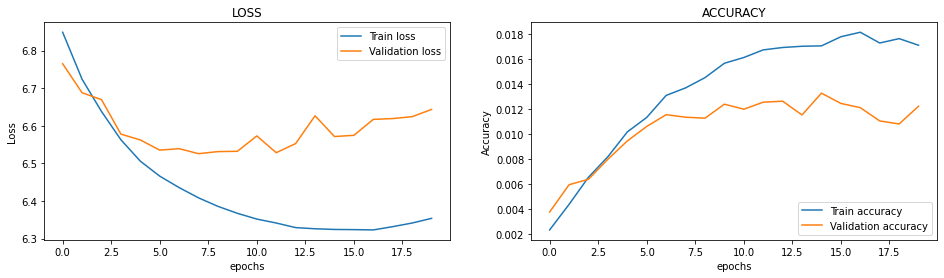

In [19]:
#TRAIN THE MODEL
tr_hist = model.fit(X, Y, batch_size=50, epochs=20, verbose=1, validation_data=(X_Val, Y_Val))


acc = model.evaluate(X_Tst, Y_Tst, verbose=1)    #Test Data Accuracy
print(f'Accuracy of Test data is: {acc[1]*100} %')

#Plot graphs
plt.figure(figsize=(16,4))  
plt.subplot(1, 2, 1)

plt.plot(tr_hist.history['loss'],label="Train loss")
plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()

**EXPORT**

In [20]:
BA = model.predict(Val)
BATCH = np.argmax(BA, axis=1)

BATCH=BATCH.astype('int').astype('<U4')
print(BATCH.dtype)
print(BATCH.shape)
print(BATCH)

<U4
(48238,)
['553' '523' '523' ... '523' '983' '523']


In [21]:
#Save to CSV

ind = np.arange(1,Val.shape[0]+1, dtype = np.int32)
print(ind.shape)

predictions = pd.DataFrame(BATCH)

column_names = ["Id", "Class"]
combine_DF=pd.DataFrame(columns = column_names)

combine_DF['Id']=ind
combine_DF['Class']=BATCH

compression_opts = dict(method='zip',archive_name='OSAMA_DNN.csv')
combine_DF.to_csv('./OSAMA_DNN_tst1_GPU.zip', index=False,compression=compression_opts)

#combine_DF.to_csv('data1.csv', index = False)            # Export pandas DataFrames to CSV
#combine_DF.to_csv('data2.csv', index = False)

(48238,)
